In [1]:
import findspark
findspark.find()
findspark.init(edit_profile=True)
import pyspark
sc = pyspark.SparkContext()

In [30]:
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import math
import datetime
from random import randint
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

#Problem 2 - Computing the Mandelbrot Set 

In [4]:
def sum_values_for_partitions(rdd):
    'Returns (as an RDD) the sum of V for each partition of a (K, V) RDD'
    # note that the function passed to mapPartitions should return a sequence,
    # not a value.
    return rdd.mapPartitions(lambda part: [sum(V for K, V in part)])

In [5]:
def draw_image(rdd):
    '''Given a (K, V) RDD with K = (I, J) and V = count,
    display an image of count at each I, J'''

    data = rdd.collect()
    I = np.array([d[0][0] for d in data])
    J = np.array([d[0][1] for d in data])
    C = np.array([d[1] for d in data])
    im = np.zeros((I.max() + 1, J.max() + 1))
    im[I, J] = np.log(C + 1)  # log intensity makes it easier to see levels
    plt.imshow(im, cmap=cm.gray)
    plt.show()

In [6]:
def mandelbrot(x, y):
    z = c = complex(x, y)
    iteration = 0
    max_iteration = 511  # arbitrary cutoff
    while abs(z) < 2 and iteration < max_iteration:
        z = z * z + c
        iteration += 1
    return iteration

## P2a.py

In [33]:
# Your code here

#build initial rdd: a 2000 * 2000 list
i_rdd = sc.parallelize(xrange(2000), 10)
i_rdd.cache()
j_rdd = sc.parallelize(xrange(2000), 10)
j_rdd.cache()

complex_rdd = i_rdd.cartesian(j_rdd)
result = complex_rdd.map(lambda x: ((x[0], x[1]),mandelbrot(x[1]/500.0 -2, x[0]/500.0 -2)))

In [25]:
result.unpersist()

PythonRDD[28] at RDD at PythonRDD.scala:43

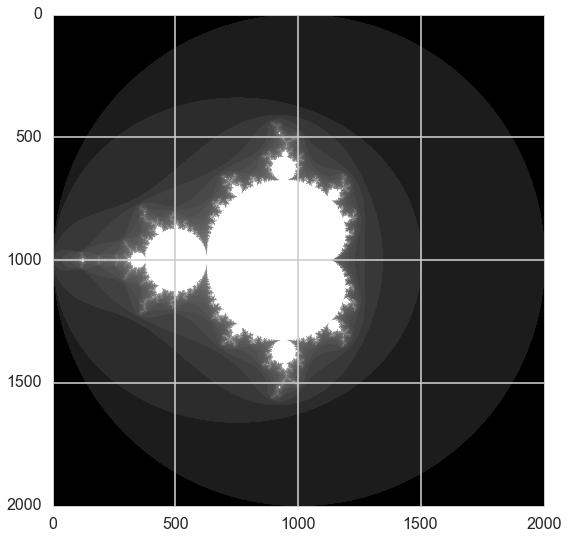

In [23]:
result.cache()
draw_image(result)

(array([ 86.,   0.,   2.,   2.,   0.,   1.,   1.,   2.,   2.,   4.]),
 array([        0.,   2044000.,   4088000.,   6132000.,   8176000.,
         10220000.,  12264000.,  14308000.,  16352000.,  18396000.,
         20440000.]),
 <a list of 10 Patch objects>)

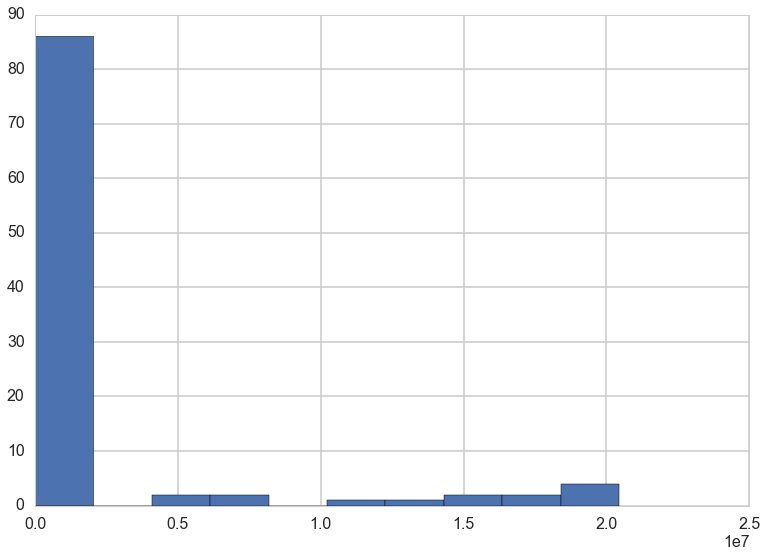

In [27]:
sum_rdd = sum_values_for_partitions(result)
plt.hist(sum_rdd.collect(), 10)

##P2b.py

In [31]:
randint?

(array([  2.,   9.,  16.,  20.,  23.,  14.,   5.,   7.,   3.,   1.]),
 array([ 1925095.,  1949651.,  1974207.,  1998763.,  2023319.,  2047875.,
         2072431.,  2096987.,  2121543.,  2146099.,  2170655.]),
 <a list of 10 Patch objects>)

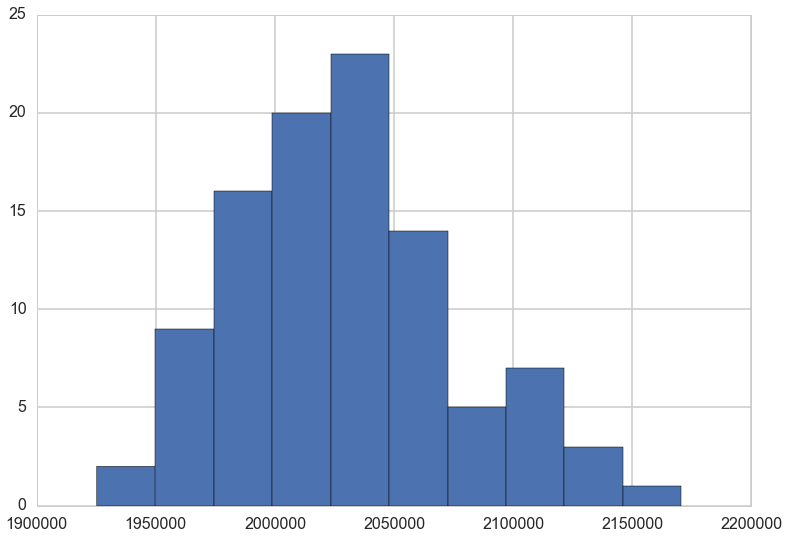

In [35]:
# Modification 1
complex_rdd = i_rdd.cartesian(j_rdd).partitionBy(100, lambda hash_key: np.random.randint(0, 100, size=1)[0])
result = complex_rdd.map(lambda x: ((x[0], x[1]),mandelbrot(x[1]/500.0 -2, x[0]/500.0 -2)))
sum_rdd = sum_values_for_partitions(result)
plt.hist(sum_rdd.collect(), 10)


In [ ]:
plt.savefig('P2b hist 1.png')